# Library import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16,6)
plt.rcParams['font.size'] = 12
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data_dir = '/content/drive/MyDrive/실험1'

In [4]:
train_df = pd.read_csv(data_dir+'/iris_train.csv')
train_df.drop(['id'],axis=1,inplace=True)
test_df = pd.read_csv(data_dir+'/iris_test.csv')

In [5]:
test_df.head()

,id,species,sepal length (cm),petal length (cm)
0,0,setosa,5.4,1.7
1,1,setosa,5.7,1.5
2,2,setosa,5.3,1.5
3,3,setosa,5.1,1.9
4,4,virginica,6.0,4.8


# Imbalance preprocessing

In [6]:
from imblearn.over_sampling import *
X=train_df.drop(['species'],axis=1)
y=train_df['species']
X_samp, y_samp = SMOTE(random_state=42).fit_sample(X, y)

In [7]:
train_df_ros = pd.DataFrame(X_samp, columns=X.columns)
train_df_ros['species'] = y_samp

In [8]:
train_df_ros = train_df_ros[train_df.columns]

In [9]:
train_df_ros_aug = train_df_ros.copy()

In [10]:
np.random.seed(seed=777) 

In [11]:
train_df_ros_aug.species.value_counts()

setosa        30
versicolor    30
virginica     30
Name: species, dtype: int64

# Augmentation

In [12]:
setosa_sl = train_df_ros_aug[train_df_ros_aug.species == 'setosa']['sepal length (cm)']
setosa_pl = train_df_ros_aug[train_df_ros_aug.species == 'setosa']['petal length (cm)']
setosa_sw = train_df_ros_aug[train_df_ros_aug.species == 'setosa']['sepal width (cm)']
setosa_pw = train_df_ros_aug[train_df_ros_aug.species == 'setosa']['petal width (cm)']
setosa_aug = {
    'species' : 'setosa',
    'sepal length (cm)' : np.random.normal(setosa_sl.mean(), setosa_sl.std()*0.6, 15),
    'petal length (cm)' : np.random.normal(setosa_pl.mean(), setosa_pl.std()*0.6, 15),
    'sepal width (cm)' : np.random.normal(setosa_sw.mean(), setosa_sw.std()*0.6, 15),
    'petal width (cm)' : np.random.normal(setosa_pw.mean(), setosa_pw.std()*0.6, 15)}
setosa_aug_df = pd.DataFrame(setosa_aug)

In [13]:
versicolor_sl = train_df_ros_aug[train_df_ros_aug.species == 'versicolor']['sepal length (cm)']
versicolor_pl = train_df_ros_aug[train_df_ros_aug.species == 'versicolor']['petal length (cm)']
versicolor_sw = train_df_ros_aug[train_df_ros_aug.species == 'versicolor']['sepal width (cm)']
versicolor_pw = train_df_ros_aug[train_df_ros_aug.species == 'versicolor']['petal width (cm)']
versicolor_aug = {
    'species' : 'versicolor',
    'sepal length (cm)' : np.random.normal(versicolor_sl.mean(), versicolor_sl.std()*0.3, 7),
    'petal length (cm)' : np.random.normal(versicolor_pl.mean(), versicolor_pl.std()*0.3, 7),
    'sepal width (cm)' : np.random.normal(versicolor_sw.mean(), versicolor_sw.std()*0.3, 7),
    'petal width (cm)' : np.random.normal(versicolor_pw.mean(), versicolor_pw.std()*0.3, 7)}
versicolor_aug_df = pd.DataFrame(versicolor_aug)

In [14]:
virginica_sl = train_df_ros_aug[train_df_ros_aug.species == 'virginica']['sepal length (cm)']
virginica_pl = train_df_ros_aug[train_df_ros_aug.species == 'virginica']['petal length (cm)']
virginica_sw = train_df_ros_aug[train_df_ros_aug.species == 'virginica']['sepal width (cm)']
virginica_pw = train_df_ros_aug[train_df_ros_aug.species == 'virginica']['petal width (cm)']
virginica_aug = {
    'species' : 'virginica',
    'sepal length (cm)' : np.random.normal(virginica_sl.mean(), virginica_sl.std()*0.3, 7),
    'petal length (cm)' : np.random.normal(virginica_pl.mean(), virginica_pl.std()*0.3, 7),
    'sepal width (cm)' : np.random.normal(virginica_sw.mean(), virginica_sw.std()*0.3, 7),
    'petal width (cm)' : np.random.normal(virginica_pw.mean(), virginica_pw.std()*0.3, 7)}
virginica_aug_df = pd.DataFrame(virginica_aug)

In [15]:
train_df_ros_aug_new = pd.concat([setosa_aug_df, versicolor_aug_df, virginica_aug_df], axis=0)
print(train_df_ros_aug_new.shape)
train_df_ros_aug_new.reset_index(drop=True, inplace=True)
train_df_ros_aug_new.tail()

(29, 5)


,species,sepal length (cm),petal length (cm),sepal width (cm),petal width (cm)
24,virginica,6.874994,5.328441,2.939466,1.975701
25,virginica,6.557187,5.475945,3.051159,1.989364
26,virginica,6.697649,5.889634,3.048125,1.959458
27,virginica,6.414794,5.560831,2.972068,2.115959
28,virginica,6.694662,5.438143,2.986940,2.093997


In [16]:
train_df_ros_aug_new_concat = pd.concat([train_df_ros_aug, train_df_ros_aug_new])
train_df_ros_aug_new_concat.reset_index(drop=True, inplace=True)
# sns.pairplot(data=train_df_ros_aug_new_concat, hue='species')

In [17]:
train_df = train_df_ros_aug_new_concat.copy()

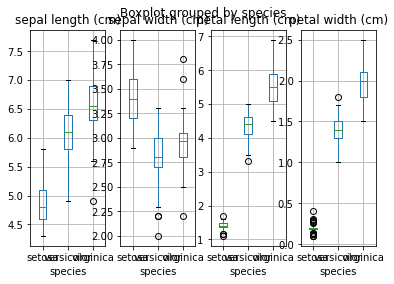

In [18]:
fig, axes = plt.subplots(1, 4)
train_df.boxplot(column='sepal length (cm)', by='species', ax=axes[0])
train_df.boxplot(column='sepal width (cm)', by='species', ax=axes[1])
train_df.boxplot(column='petal length (cm)', by='species', ax=axes[2])
train_df.boxplot(column='petal width (cm)', by='species', ax=axes[3])

In [19]:
encoder = LabelEncoder()
encoder.fit(train_df['species'])

LabelEncoder()

In [20]:
train_df.species = encoder.transform(train_df.species)
test_df.species = encoder.transform(test_df.species)
# minmaxscaler = MinMaxScaler()
# ref : https://dacon.io/competitions/official/235836/codeshare/3627?page=2&dtype=recent

In [21]:
stdscaler = StandardScaler()

In [22]:
train_df.head()

,species,sepal length (cm),petal length (cm),sepal width (cm),petal width (cm)
0,0,4.4,1.4,2.9,0.2
1,1,6.4,4.5,3.2,1.5
2,2,6.2,4.8,2.8,1.8
3,2,7.2,6.1,3.6,2.5
4,0,4.9,1.4,3.0,0.2


In [23]:
df1=train_df[train_df['species']==0].drop(['species','sepal width (cm)','petal width (cm)'],axis=1)
df1 = pd.DataFrame(stdscaler.fit_transform(df1), columns=df1.columns)
df1['sepal width (cm)']=train_df[train_df['species']==0]['sepal width (cm)'].reset_index(drop=True)
df1['petal width (cm)']=train_df[train_df['species']==0]['petal width (cm)'].reset_index(drop=True)
df1['species']=0
df2=train_df[train_df['species']==1].drop(['species','sepal width (cm)','petal width (cm)'],axis=1)
df2 = pd.DataFrame(stdscaler.fit_transform(df2), columns=df2.columns)
df2['sepal width (cm)']=train_df[train_df['species']==1]['sepal width (cm)'].reset_index(drop=True)
df2['petal width (cm)']=train_df[train_df['species']==1]['petal width (cm)'].reset_index(drop=True)
df2['species']=1

df3=train_df[train_df['species']==2].drop(['species','sepal width (cm)','petal width (cm)'],axis=1)
df3 = pd.DataFrame(stdscaler.fit_transform(df3), columns=df3.columns)
df3['sepal width (cm)']=train_df[train_df['species']==2]['sepal width (cm)'].reset_index(drop=True)
df3['petal width (cm)']=train_df[train_df['species']==2]['petal width (cm)'].reset_index(drop=True)
df3['species']=2

In [24]:
df=pd.concat([df1,df2,df3])

In [25]:
df.head()

,sepal length (cm),petal length (cm),sepal width (cm),petal width (cm),species
0,-1.275331,-0.020568,2.9,0.2,0
1,0.026515,-0.020568,3.0,0.2,0
2,-1.535700,-2.426217,3.0,0.1,0
3,-0.754592,0.781315,3.1,0.2,0
4,2.369839,-1.624334,4.0,0.2,0


In [26]:
df1=test_df[test_df['species']==0].drop(['id','species'],axis=1)
df1 = pd.DataFrame(stdscaler.fit_transform(df1), columns=df1.columns)
df1['id']=test_df[test_df['species']==0]['id'].reset_index(drop=True)
df1['species']=0

df2=test_df[test_df['species']==1].drop(['id','species'],axis=1)
df2 = pd.DataFrame(stdscaler.fit_transform(df2), columns=df2.columns)
df2['id']=test_df[test_df['species']==1]['id'].reset_index(drop=True)
df2['species']=1

df3=test_df[test_df['species']==2].drop(['id','species'],axis=1)
df3 = pd.DataFrame(stdscaler.fit_transform(df3), columns=df3.columns)
df3['id']=test_df[test_df['species']==2]['id'].reset_index(drop=True)
df3['species']=2

test_df=pd.concat([df1,df2,df3])
test_df=test_df.sort_values('id')

In [27]:
df=pd.get_dummies(df,columns=['species'])
test_df=pd.get_dummies(test_df,columns=['species'])

# Modeling

In [28]:
X=df.drop(['sepal width (cm)','petal width (cm)'],axis=1)
y1=df['sepal width (cm)']
y2=df['petal width (cm)']

In [29]:
from sklearn.linear_model import Ridge
linreg1 = Ridge(alpha=0.1)
linreg2 = Ridge(alpha=0.1)

linreg1.fit(X,y1)
linreg2.fit(X,y2)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [30]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=10, shuffle=True)

score1 = cross_val_score(linreg1, X, y1, cv=kfold, scoring="neg_mean_absolute_error")
score2 = cross_val_score(linreg2, X, y2, cv=kfold, scoring="neg_mean_absolute_error")
print(-score1.mean(), -score2.mean())

0.18174443388911646 0.10933940390260186


In [31]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

def train_test_mae(d, feature_cols, y):
    X = d[feature_cols]
    Y = d[y]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
    linreg = Ridge(alpha=0.1)
    linreg.fit(X_train, Y_train)
    Y_pred = linreg.predict(X_train)
    print('training RMSE : {:.4f}'.format(np.sqrt(metrics.mean_squared_error(Y_train, Y_pred))))
    Y_pred = linreg.predict(X_test)
    print('test RMSE : {:.4f}'.format(np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))))
    print('\n')
    return np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))

In [32]:
_ = train_test_mae(df,  X.columns, 'sepal width (cm)')

training RMSE : 0.2363
test RMSE : 0.2232




In [33]:
_ = train_test_mae(df, X.columns, 'petal width (cm)')

training RMSE : 0.1424
test RMSE : 0.1981




In [34]:
xg_parameters ={'max_depth' : [3,4,5] ,
                'booster' : ['gblinear'],
                'subsample' : [0.5, 0.75],
                'n_estimators': [1000, 10000],
                'learning_rate':[0.1, 0.25],
                'min_child_weight':[0.5, 1.5],
                'reg_alpha': [0, 0.5],
                'reg_lambda': [0, 0.5],
                'random_state':[42]}

In [35]:
from sklearn import model_selection
import xgboost
xg = xgboost.XGBRegressor(objective='reg:squarederror')

#gridsearch
grid_search_xg = model_selection.GridSearchCV(estimator = xg, param_grid = xg_parameters, scoring = 'neg_mean_absolute_error', cv = 10 )
 
grid_search_xg.fit(X, y1)
#best hyper parameter값을 받음
best_xg = grid_search_xg.best_estimator_
best_xg


XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=0.5, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=42, reg_alpha=0, reg_lambda=0, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.5, verbosity=1)

In [36]:
xg = xgboost.XGBRegressor(objective='reg:squarederror')
#RFC모델에 대한 grid search, scoring기준은 recall값으로, cross-validation은 10회 반복한다는 뜻임
grid_search_xg = model_selection.GridSearchCV(estimator = xg, param_grid = xg_parameters, scoring = 'neg_mean_absolute_error', cv = 10 )
 
grid_search_xg.fit(X, y2)
#best hyper parameter값을 받음
best_xg = grid_search_xg.best_estimator_
best_xg

XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=0.5, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=42, reg_alpha=0, reg_lambda=0, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.5, verbosity=1)

In [37]:
#for y1
xgb_model1 = xgboost.XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=0.5, missing=None, n_estimators=10000,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=42, reg_alpha=0, reg_lambda=0, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.5, verbosity=1)

In [38]:
#for y2
xgb_model2 = xgboost.XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.25, max_delta_step=0,
             max_depth=3, min_child_weight=0.5, missing=None, n_estimators=10000,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=42, reg_alpha=0, reg_lambda=0, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.5, verbosity=1)

In [39]:
from sklearn.model_selection import train_test_split

def train_test_mae(d, feature_cols, y):
    X = d[feature_cols]
    Y = d[y]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    if y == 'sepal width (cm)':
      xgb_model = xgb_model1
    else:
      xgb_model = xgb_model2
    
    xgb_model.fit(X_train, Y_train)
    Y_pred = xgb_model.predict(X_train)
    print('training MAE : {:.4f}'.format(np.sqrt(metrics.mean_squared_error(Y_train, Y_pred))))
    Y_pred = xgb_model.predict(X_test)
    print('test MAE : {:.4f}'.format(np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))))
    print('\n')
    return np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))

In [40]:
_ = train_test_mae(df,  X.columns, 'sepal width (cm)')

training MAE : 0.2255
test MAE : 0.2720




In [41]:
_ = train_test_mae(df,  X.columns, 'petal width (cm)')

training MAE : 0.1405
test MAE : 0.1788




---
#Submission Place

In [42]:
submission = pd.read_csv(data_dir+'/sample_submission.csv')

In [43]:
submission.head()

,id,sepal width (cm),petal width (cm)
0,0,0,0
1,1,0,0
2,2,0,0
3,3,0,0
4,4,0,0


In [44]:
X.head(3)

,sepal length (cm),petal length (cm),species_0,species_1,species_2
0,-1.275331,-0.020568,1,0,0
1,0.026515,-0.020568,1,0,0
2,-1.535700,-2.426217,1,0,0


In [45]:
y2.head(3)

0    0.2
1    0.2
2    0.1
Name: petal width (cm), dtype: float64

In [46]:
test_df.head()

,sepal length (cm),petal length (cm),id,species_0,species_1,species_2
0,1.091590,1.221146,0,1,0,0
1,2.015920,0.111013,1,1,0,0
2,0.783480,0.111013,2,1,0,0
3,0.167260,2.331278,3,1,0,0
0,-1.081863,-1.652373,4,0,0,1


In [47]:
xgb_model2.fit(X,y2)
submission['petal width (cm)']=xgb_model2.predict(test_df.drop('id', axis=1))

In [48]:
xgb_model1.fit(X,y1)
submission['sepal width (cm)']=xgb_model1.predict(test_df.drop('id', axis=1))

In [49]:
submission.set_index('id', inplace=True)

In [50]:
submission.head()

,sepal width (cm),petal width (cm)
id,,
0,3.615495,0.298500
1,3.759502,0.223834
2,3.544842,0.212826
3,3.471489,0.373167
4,2.726073,1.876885


In [51]:
import datetime
datetime.date.today()

datetime.date(2021, 10, 29)

In [52]:
cd /content/drive/MyDrive/실험1

/content/drive/MyDrive/실험1


In [53]:
submit_date = datetime.date.today()
submit_title = f'{submit_date}-submission2-2.csv'
submission.to_csv(submit_title)

In [54]:
pwd

'/content/drive/My Drive/실험1'